## Goal

Render the following logical syntactic objects in Jupyter Notebook output area in various formats. It should be able to be rendered in Google Colab too.

* terms (string and AST)
* formulas (string and AST)
* Tableaux
* Fitch proofs


We need to get the size = (width, height) of each node element, which are typlically rendered by

```
txt_obj = ax.text(xcoord, ycoord, r"$A \wedge B$", 
                  fontsize=12, ha='center', va='center')
```

The size of `txt_obj` is obtained by

```
r = fig.canvas.get_renderer()
bbox = txt_obj.get_window_extent(renderer=r)
```

`bbox` has lots of properties. (You can see them by dir(bbox).)

Among them `.x0, .x1, .width, .y0, .y1, .height` are most important.

In [7]:
from matplotlib import pyplot as plt

plt.rcParams["mathtext.fontset"] = "cm" # cm = computer modern by Donald Knuth
plt.rcParams["figure.dpi"] = 300 # default 100
plt.rcParams["text.usetex"] = False # use LaTeX to render text

fig = plt.figure(figsize=(3,2)) 
  # figsize=(width, height) in inches for dpi=100 (default).
  # Since we set dpi=300, the actual width and height are 3*300=900 and 2*300=600 pixels.

ax = fig.add_subplot(111, aspect='equal')
# We could've used fig, ax = plt.subplots(1, 1) instead of fig.add_subplot(111).
# Then ax.set(aspect='equal') would be needed to make the plot square.
# The difference is that fig.add_subplot(111) returns an Axes object,
# whereas plt.subplots(1, 1) returns a Figure object and an Axes object.
# The Axes object is the actual plot, and the Figure object is the container for the plot.

ax.set_xlim(0, 3) # set x-axis limits. Default is (0, 1). 
ax.set_ylim(0, 2) # set y-axis limits. Default is (0, 1).

# Set x-axis tick locations at intervals of 0.2
ax.set_xticks([i/5 for i in range(16)])
# Set y-axis tick locations at intervals of 0.2
ax.set_yticks([i/5 for i in range(11)])
# Set x-axis tick labels
ax.tick_params(axis='both', which='major', labelsize=5)

ax.grid(True, linewidth=0.2) # show grid lines with linewidth 0.2


# Set x-axis label with font size 5
# ax.set_xlabel('X Label', fontsize=5)

# Set y-axis label with font size 5
# ax.set_ylabel('Y Label', fontsize=5)


# Plot using Data Coordinate
txt1 = ax.text(0.5, 0.5, r'$A \;\le\; B$', fontsize=6,
             ha='center', va='center')
# r'..' means raw string. It is useful for LaTeX, for otherwise 
# we need to escape backslash and underscore, which is annoying.
# ha = horizontal alignment, va = vertical alignment
# ha = 'center', 'left', 'right', 'center_baseline'
# va = 'center', 'top', 'bottom', 'baseline'

# Plot using Axes Coordinate. (0.5, 0.5) means the center of axes.
# Note the added argument transform=ax.transAxes.
txt2 = ax.text(0.5, 0.5, 
             r'$A \;\rightarrow\; B$', fontsize=6,
             ha='center', va='center', transform=ax.transAxes)

r = fig.canvas.get_renderer()

bbox = txt1.get_window_extent(renderer=r)
print(bbox, type(bbox))

ValueError: 
A \;\le\; B
    ^
ParseFatalException: Unknown symbol: \le, found '\'  (at char 4), (line:1, col:5)

Error in callback <function _draw_all_if_interactive at 0x11cd6e7a0> (for post_execute):


ValueError: 
A \;\le\; B
    ^
ParseFatalException: Unknown symbol: \le, found '\'  (at char 4), (line:1, col:5)

ValueError: 
A \;\le\; B
    ^
ParseFatalException: Unknown symbol: \le, found '\'  (at char 4), (line:1, col:5)

<Figure size 900x600 with 1 Axes>

In order to use the size related properties of bbox, we need to convert the units to data coordinate and/or axes coordinate.

In [5]:
def get_bbox(txt):
    r = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=r) # unit: pixel
    bbox_data_coord = bbox.transformed(ax.transData.inverted()) 
    bbox_axes_coord = bbox.transformed(ax.transAxes.inverted())
    return bbox, bbox_data_coord, bbox_axes_coord

def show_bbox(bbox):
    print(f'x0 = {bbox.x0:.3f}, x1 = {bbox.x1:.3f}, width = {bbox.width:.3f}')
    print(f'y0 = {bbox.y0:.3f}, y1 = {bbox.y1:.3f}, height = {bbox.height:.3f}')


In [6]:
bbox1, bbox1_data_coord, bbox1_axes_coord = get_bbox(txt1)

print("txt1")
print("\npixel unit")
show_bbox(bbox1)
print("\ndata coordinate")
show_bbox(bbox1_data_coord)
print("\naxes coordinate")
show_bbox(bbox1_axes_coord)

bbox2, bbox2_data_coord, bbox2_axes_coord = get_bbox(txt2)

print("\ntxt2")
print("\npixel unit")
show_bbox(bbox2)
print("\ndata coordinate")
show_bbox(bbox2_data_coord)
print("\naxes coordinate")
show_bbox(bbox2_axes_coord)


txt1

pixel unit
x0 = 191.841, x1 = 268.659, width = 76.819
y0 = 169.500, y1 = 193.500, height = 24.000

data coordinate
x0 = 0.334, x1 = 0.666, width = 0.333
y0 = 0.448, y1 = 0.552, height = 0.104

axes coordinate
x0 = 0.111, x1 = 0.222, width = 0.111
y0 = 0.224, y1 = 0.276, height = 0.052

txt2

pixel unit
x0 = 422.841, x1 = 499.659, width = 76.819
y0 = 285.000, y1 = 309.000, height = 24.000

data coordinate
x0 = 1.334, x1 = 1.666, width = 0.333
y0 = 0.948, y1 = 1.052, height = 0.104

axes coordinate
x0 = 0.445, x1 = 0.555, width = 0.111
y0 = 0.474, y1 = 0.526, height = 0.052


The conversion among the units are weird, as you see in the following computation.

Anyway, as long as we stick to data coordinate, we are just fine.

In [7]:
print(bbox1.x0/bbox1_data_coord.x0, bbox1.x1/bbox1_data_coord.x1, bbox1.width/bbox1_data_coord.width)

print(bbox1.y0/bbox1_data_coord.y0, bbox1.y1/bbox1_data_coord.y1, bbox1.height/bbox1_data_coord.height)

print(bbox2.x0/bbox2_data_coord.x0, bbox2.x1/bbox2_data_coord.x1, bbox2.width/bbox2_data_coord.width)

print(bbox2.y0/bbox2_data_coord.y0, bbox2.y1/bbox2_data_coord.y1, bbox2.height/bbox2_data_coord.height)


574.8449003133604 403.22645400220233 230.9999999999999
378.30434782608694 350.5764705882353 231.00000000000006
317.03715890429106 299.8662269016713 230.99999999999997
300.61643835616434 293.74074074074076 231.00000000000043


We will always use `ha='center', va='center'`.
We will always use data coordinate.

Define some classes.

In [8]:
class Tbox: # text object together with its position and size
  def __init__(self, txt, r):
    # txt is a text object
    # r is a renderer
    self.txt = txt # matplotlib.text.Text object
      # txt.get_text() is the label (latex source string)
    bbox = txt.get_window_extent(renderer=r) # unit: pixel
    bbox_d = bbox.transformed(ax.transData.inverted()) # unit: data coordinate
    x, y = txt.get_position()
    self.x = x
    self.y = y
    self.width = bbox_d.width
    self.height = bbox_d.height

  def __str__(self):
    return f"x = {self.x:.3f}, y = {self.y:.3f}, w = {self.width:.3f}, h = {self.height:.3f}"
    
class Node:
  def __init__(self, txt, r, unit_len = 0.12, kx=3, ky=1, overhang=0.14, children=None):
    # txt = ax.text(pos_x, pos_y, string, ..) is a text object
    # r is a renderer
    # dx is the horizontal distances between the children
    # dy is the vertical distance between the root and the children    
    # children is a list of Node objects    
    # Roote's position is (0, 0). When rendering, we will shift the
    # node's center to the center of the figure.
    # The root and each child's position is relative to the center of the node.
    
    self.parent = None # This changes later iff self is not the real(one and only) root.
    self.x = self.y = 0
    self.root = tbox = Tbox(txt, r)
    self.children = None
    self.unit_height = unit_len
    self.overhang = overhang
    # Both (self.x, self.y) and (self.root.x, self.root.y) are positions of 
    # the root of self.  
    # The meaning of (self.x, self.y) depends on self.parent.
    # If self.parent is None, then (self.x, self.y) is not used at all.
    # If self.parent is not None, then (self.x, self.y) is the position of the root of self
    # relative to the root of self.parent.
    # (self.root.x, self.root.y) has meaning iff self.parent is None.
    # It is the position (x, y) given when the text object was created by ax.text(x, y, ...) 
    # Normally it is (center_x, center_y) of the axis.

    dx = kx * unit_len
    dy = ky * unit_len
    unit_height = self.unit_height # height of each node (considered as a rectangle)
    if children:
      self.children = children
      # Compute the total width of the children.
      tot_width = sum([kid.width for kid in children]) + (len(children)-1)*dx
      self.width = tot_width
      # Compute the total height of the node
      max_height = max([kid.height for kid in children])
      tot_height = max_height + dy + unit_height
      self.height = tot_height
      # Get the position of each kid's root relative to the root of self.
      # dlrkids = distance between the leftmost kid's root and the rightmost kid's root
      #           = tot_width - (children[0].width + children[-1].width)/2
      # xvec = [-dlrkids/2, += children[0].width/2 + children[1].width/2 + dx, += ...]
      # xvec[-1] must be dlrkids/2
      # y = dy
      wl = children[0].width # width of the leftmost child
      wr = children[-1].width # width of the rightmost child
      dlrkids = tot_width - (wl + wr)/2
      for i, kid in enumerate(children):
        kid.parent = self
        kid.y = dy + unit_height
        if i==0:
          kid.x = -dlrkids/2 
        else:
          kid.x = children[i-1].x + children[i-1].width/2 + dx + children[i].width/2
      
      assert abs(children[-1].x - dlrkids/2) < 1e-6, "the last child's x is wrong"

    else:
      self.children = []
      self.width = tbox.width
      self.height = unit_height
    
  def __str__(self):
    return self.get_str()
  
  def get_str(self):
    # recursively print the tree
    s = (f"root: {self.root.txt.get_text()[1:-1]}, " +
         f"position: ({self.x:.3f}, {self.y:.3f}), " +
         f"width: {self.width:.3f}, height: {self.height:.3f}\n")
    if self.children:
      for kid in self.children:
        s += kid.get_str() # should revise using join()
    return s
   
  def draw_tree(self, plt1):
    # Draw the root.
    if self.parent is None:
      x_ref, y_ref = (self.root.x, self.root.y) # normally (center_x, center_y)
      if self.children: # Then we shift the root down and maybe left/right too
          # so that the center of the whole tree coincides with the center of the axis.
        node_left = self.children[0]
        node_right = self.children[-1]
        wl = node_left.width
        wr = node_right.width
        x = x_ref + (wl - wr)/4
        y = y_ref - self.height/2 + self.unit_height/2
        self.root.txt.set_position((x, y))
        self.x, self.y = (x, y)
        # draw the horizontal line
        plt1.hlines(y + self.unit_height, x+node_left.x-self.overhang, 
                    x+node_right.x+self.overhang, linewidth=0.2, color='black')
      else: # Then there is no need to shift the root.
        pass
      self.root.txt.set_alpha(1)
    else:
      x_ref, y_ref = (self.parent.x, self.parent.y)
      x = x_ref + self.x
      y = y_ref + self.y
      self.root.txt.set_position((x, y))
      self.x, self.y = (x, y)
      self.root.txt.set_alpha(1)

    # Draw the children.
    if self.children:
      # draw horizontal line
      node_left = self.children[0]
      node_right = self.children[-1]
      plt1.hlines(self.y + self.unit_height, 
                   self.x + node_left.x - self.overhang, self.x + node_right.x + self.overhang,
                   linewidth=0.2, color='black')
      # draw subtrees
      for kid in self.children:
        kid.draw_tree(plt1)



root: \to, position: (0.000, 0.000), width: 2.354, height: 0.840
root: \neg, position: (-0.678, 0.240), width: 0.723, height: 0.600
root: \vee, position: (-0.000, 0.240), width: 0.723, height: 0.360
root: A, position: (-0.271, 0.240), width: 0.173, height: 0.120
root: D, position: (0.271, 0.240), width: 0.190, height: 0.120
root: \wedge, position: (0.678, 0.240), width: 1.271, height: 0.360
root: B, position: (-0.543, 0.240), width: 0.180, height: 0.120
root: C, position: (-0.003, 0.240), width: 0.181, height: 0.120
root: D, position: (0.543, 0.240), width: 0.190, height: 0.120



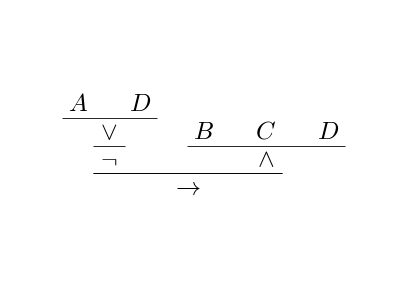

In [9]:
from matplotlib import pyplot as plt

plt.rcParams["mathtext.fontset"] = "cm" # cm = computer modern by Donald Knuth
plt.rcParams["figure.dpi"] = 300 # default 100
fig, ax = plt.subplots(1, 1, figsize=(1.5, 1))
ax.set(aspect='equal')
ax.set_xlim(0, 3) 
ax.set_ylim(0, 2) 

# ax.set_xticks([i/2 for i in range(7)])
# ax.set_yticks([i/2 for i in range(5)])
# ax.tick_params(axis='both', labelsize=5)

# ax.grid(True, linewidth=0.2)
ax.axis('off')

center_x = ax.get_xlim()[1] / 2
center_y = ax.get_ylim()[1] / 2

r = fig.canvas.get_renderer()

txt_lc1 = ax.text(0, 0, r'$A$', ha='center', va='center',
                  fontsize=6, alpha=0)
tree_lc1 = Node(txt_lc1, r)
txt_lc2 = ax.text(0, 0, r'$D$', ha='center', va='center',
                  fontsize=6, alpha=0)
tree_lc2 = Node(txt_lc2, r)           

txt_lc = ax.text(0, 0, r'$\vee$', ha='center', va='center', 
                 fontsize=6, alpha=0)
tree11 = Node(txt_lc, r, children=[tree_lc1, tree_lc2])

txt_left = ax.text(0, 0, r'$\neg$', ha='center', va='center',
                   fontsize=6, alpha=0)
tree1 = Node(txt_left, r, children=[tree11])

txt_r1 = ax.text(0, 0, r'$B$', ha='center', va='center', 
                 fontsize=6, alpha=0)
txt_r2 = ax.text(0, 0, r'$C$', ha='center', va='center',
                  fontsize=6, alpha=0)
txt_r3 = ax.text(0, 0, r'$D$', ha='center', va='center',
                  fontsize=6, alpha=0)
tree_r1 = Node(txt_r1, r)
tree_r2 = Node(txt_r2, r)
tree_r3 = Node(txt_r3, r)
txt_r = ax.text(0, 0, r'$\wedge$', ha='center', va='center',
                fontsize=6, alpha=0)
tree2 = Node(txt_r, r, children=[tree_r1, tree_r2, tree_r3])

txt = ax.text(center_x, center_y, r'$\to$', ha='center', va='center', 
              fontsize=6, alpha=0)

tree = Node(txt, r, children=[tree1, tree2])
print(tree)
tree.draw_tree(plt)
